## Patinage avec CartPole

> **Problème** : Si Peter veut échapper au loup, il doit pouvoir se déplacer plus vite que lui. Nous allons voir comment Peter peut apprendre à patiner, en particulier à garder l'équilibre, en utilisant le Q-Learning.

Tout d'abord, installons le gym et importons les bibliothèques nécessaires :


In [1]:
#code block 1

## Créer un environnement cartpole


In [ ]:
#code block 2

Pour voir comment fonctionne l'environnement, exécutons une courte simulation de 100 étapes.


In [ ]:
#code block 3

Lors de la simulation, nous devons obtenir des observations afin de décider comment agir. En fait, la fonction `step` nous renvoie les observations actuelles, la fonction de récompense et le drapeau `done` qui indique s'il est pertinent de continuer la simulation ou non :


In [ ]:
#code block 4

Nous pouvons obtenir la valeur minimale et maximale de ces nombres :


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Explorons également une autre méthode de discrétisation en utilisant des intervalles :


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Faisons maintenant une courte simulation et observons ces valeurs d'environnement discrètes.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Structure de la table Q


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


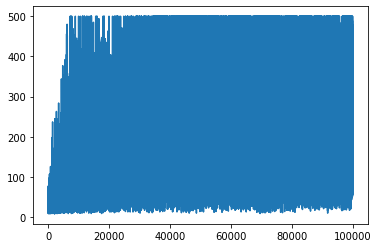

In [20]:
plt.plot(rewards)

À partir de ce graphique, il n'est pas possible de tirer des conclusions, car en raison de la nature du processus d'entraînement stochastique, la durée des sessions d'entraînement varie considérablement. Pour donner plus de sens à ce graphique, nous pouvons calculer une **moyenne glissante** sur une série d'expériences, disons 100. Cela peut être fait facilement en utilisant `np.convolve`:


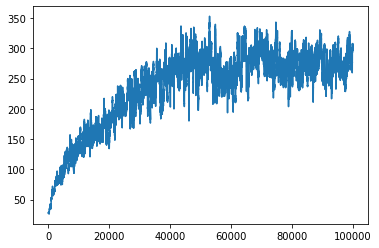

In [22]:
#code block 12

## Variation des hyperparamètres et observation des résultats en action

Il serait maintenant intéressant de voir concrètement comment le modèle entraîné se comporte. Lançons la simulation, en suivant la même stratégie de sélection d'actions que pendant l'entraînement : un échantillonnage basé sur la distribution de probabilités dans la Q-Table :


In [23]:
# code block 13

## Sauvegarder le résultat en GIF animé

Si vous voulez impressionner vos amis, vous pouvez leur envoyer une image GIF animée du mât d'équilibre. Pour ce faire, nous pouvons utiliser `env.render` pour produire une image, puis enregistrer ces images en GIF animé en utilisant la bibliothèque PIL :


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Avertissement** :  
Ce document a été traduit à l'aide du service de traduction automatique [Co-op Translator](https://github.com/Azure/co-op-translator). Bien que nous nous efforcions d'assurer l'exactitude, veuillez noter que les traductions automatisées peuvent contenir des erreurs ou des inexactitudes. Le document original dans sa langue d'origine doit être considéré comme la source faisant autorité. Pour des informations critiques, il est recommandé de recourir à une traduction professionnelle réalisée par un humain. Nous déclinons toute responsabilité en cas de malentendus ou d'interprétations erronées résultant de l'utilisation de cette traduction.
